# AutoGluon

AutoGluon aims to provide automatic machine learning (Auto ML) support for MXNet and Gluon. AutoGluon focuses on automatic deep learning (Auto DL). AutoGluon targets: 

* *Beginners *are* *70~80% of the customers who would be interested in AutoGluon. The basic Auto ML  scenario: customers have a traditional machine learning task by hand, provide own raw data, watch the search process, and finally obtain a good quality model. The beginners include but not limited to engineers and students, who are generally new to machine learning. 
* *Advanced users *aim to own full control and access to the Auto ML overall process as well as each important component, such as constructing own networks, metrics, losses, optimizers, searcher and trial scheduler. The advanced users could potentially have more specified constraints regarding to the automatic searching procedure. The advanced users include but not limited to experienced machine learning researchers and engineers.
* *Contributors: *Contributors are Advanced users who will create strategies that are useful for beginners either extending to new datasets, new domains, new algorithms or bringing state of art results to save time and effort.

The AutoGluon's design principles are:

* *Easy to use: *Deep learning framework users could use AutoGluon almost right away. The only usage difference between AutoGluon and Gluon is that: rather than providing a fixed value to different deep learning components, we enable a searchable range to let Auto ML decides which are the best, whereas all the major APIs' usage stays the same.
* *Easy to extend: *From user perspective, we organize the AutoGluon by tasks, users could easily use all the task specific components, such as data preprocessing, model zoo, metrics and losses, so that adding a new task could very straightforward. In this way, advanced ML tasks, such as GAN ,could be easily incorporated by providing a new task module. From system perspective, multiple back-ends could be used since the front-end are designed to be separate from the backends, this could be beneficial to extend to production-level Auto ML.

In the following*, we use Image Classification as a running example* to illustrate the usage of AutoGluon's main APIs.


## Preparation

### Import AutoGluon

In [1]:
import warnings
warnings.filterwarnings("ignore")

import autogluon as ag

DEBUG:matplotlib.backends:backend module://ipykernel.pylab.backend_inline version unknown


### Import Task

We are using image classification as an example in this notebook.

In [2]:
from autogluon import image_classification as task

## A Quick Image Classification Example

We first show the most basic usage by first creating a dataset and then fiting the dataset to generate the results with the image classification example.

### Create AutoGluon Dataset

We use CIFAR10 for image classfication for demo purpose.

In [3]:
dataset = task.Dataset(train_path='./CIFAR10/train', val_path='./CIFAR10/valid')

print(dataset)

The constructed dataset contains the `gluon.data.DataLoader` for the CIFAR10 training and validation datasets.

In [4]:
print(dataset.train_data)
print(dataset.val_data)

The number of classes are automatically inferred.

In [5]:
print(dataset.num_classes)

10


Then we will use the default configuration of the image classification to generate:
* Best result of the search in terms of accuracy
* According best configuration regarding to the best result
    
To acheive this, we are using `fit` function to generate the above results based on the datasets.

The default configruation is based on `max_trial_count=10` and `max_training_epochs=1`. This will take approximately 10min to finish.

DEBUG:autogluon.task.image_classification.core:Start fitting
DEBUG:autogluon.task.image_classification.core:Start constructing search space
DEBUG:autogluon.task.image_classification.core:Finished.
DEBUG:autogluon.task.image_classification.core:Start using default backend.
INFO:autogluon.scheduler.fifo:Starting Experiments
INFO:autogluon.scheduler.fifo:Num of Finished Tasks is 0
INFO:autogluon.scheduler.fifo:Num of Pending Tasks is 10
DEBUG:autogluon.scheduler.fifo:Adding A New Task Task(TASK_ID: 0) Task(fn=<function train_image_classification at 0x7fc60f3129d8>, args={'args': Namespace(epochs=1, lr=0.0001, model='resnet18_v1', optimizer='sgd', pretrained=True, train_data='./CIFAR10/train', val_data='./CIFAR10/valid'), 'config': {'fitspace:model': 'resnet34_v1', 'fitspace:optimizer': 'sgd', 'fitspace:lr': 0.00010478116717265095, 'fitspace:momentum': 0.8816854227138787, 'fitspace:pretrained': True}}, resources=Resources(nCPUs = 4, nGPUs = 1)))
DEBUG:autogluon.scheduler.resource_manager:R

DEBUG:autogluon.basic.decorators:Reporter Done!
DEBUG:autogluon.scheduler.reporter:StatusReporter reporting: {"done": true, "time_this_iter": 0.18712639808654785}
DEBUG:autogluon.basic.decorators:Reporter Done!
DEBUG:autogluon.scheduler.reporter:StatusReporter reporting: {"done": true, "time_this_iter": 0.12806344032287598}
DEBUG:autogluon.basic.decorators:Reporter Done!
DEBUG:autogluon.scheduler.reporter:StatusReporter reporting: {"done": true, "time_this_iter": 0.11692070960998535}
INFO:autogluon.searcher.searcher:Finished Task with config: {"fitspace:model": "resnet101_v1", "fitspace:optimizer": "adam", "fitspace:lr": 0.054054546569617355, "fitspace:momentum": 0.8933316015571741, "fitspace:pretrained": false} and reward: 0.245
DEBUG:autogluon.scheduler.fifo:Saving Checkerpoint
DEBUG:autogluon.scheduler.scheduler:State_Dict cls.FINISHED_TASKS: [{'TASK_ID': 6, 'Config': {'fitspace:model': 'resnet101_v1', 'fitspace:optimizer': 'adam', 'fitspace:lr': 0.054054546569617355, 'fitspace:mome

INFO:autogluon.searcher.searcher:Finished Task with config: {"fitspace:model": "resnet34_v1", "fitspace:optimizer": "sgd", "fitspace:lr": 0.00010478116717265095, "fitspace:momentum": 0.8816854227138787, "fitspace:pretrained": true} and reward: 0.2457
DEBUG:autogluon.scheduler.fifo:Saving Checkerpoint
DEBUG:autogluon.scheduler.scheduler:State_Dict cls.FINISHED_TASKS: [{'TASK_ID': 6, 'Config': {'fitspace:model': 'resnet101_v1', 'fitspace:optimizer': 'adam', 'fitspace:lr': 0.054054546569617355, 'fitspace:momentum': 0.8933316015571741, 'fitspace:pretrained': False}}, {'TASK_ID': 5, 'Config': {'fitspace:model': 'resnet50_v1', 'fitspace:optimizer': 'adam', 'fitspace:lr': 0.051449363058242444, 'fitspace:momentum': 0.949490038379711, 'fitspace:pretrained': True}}, {'TASK_ID': 1, 'Config': {'fitspace:model': 'resnet101_v1', 'fitspace:optimizer': 'adam', 'fitspace:lr': 0.0007320528860097534, 'fitspace:momentum': 0.8963548623074746, 'fitspace:pretrained': True}}, {'TASK_ID': 4, 'Config': {'fitspa

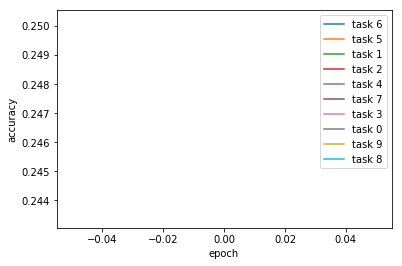

In [6]:
models = task.fit(dataset)

The best accuracy is:

In [7]:
print(models[1])

0.2502


The associated best configuration is:

In [8]:
print(models[2])

{'fitspace:model': 'resnet18_v1', 'fitspace:optimizer': 'sgd', 'fitspace:lr': 0.00039744248054141424, 'fitspace:momentum': 0.9389562843488237, 'fitspace:pretrained': False}


## A Step-by-step Image Classification Example

We first introduce the basic configuration `autogluon.space`, which is used to represent the search space of each task components, we will then go throught each components, including 

* `autogluon.Dataset`
* `autogluon.Nets`
* `autogluon.Optimizers`
* `autogluon.Losses`
* `autogluon.Metrics`

and finally put all together to `fit` to generate best results.

### Create AutoGluon Space

`autogluon.space` is a search space containing a set of configuration candidates.
We provide three basic space types.

* Categorical Space

In [9]:
list_space = ag.space.List('listspace', ['0', '1', '2'])
print(list_space)

AutoGluon List Space listspace: ['0', '1', '2']


* Linear Space

In [10]:
linear_space = ag.space.Linear('linspace', 0, 10)
print(linear_space)

AutoGluon Linear Space linspace: lower 0, upper 10


* Log Space

In [11]:
log_space = ag.space.Log('logspace', 10**-10, 10**-1)
print(log_space)

AutoGluon Log Space logspace: lower 0.000000, upper 0.100000


* An Example of Random Sample from the Combined Space

In [12]:
print(ag.space.sample_configuration([list_space, linear_space, log_space]))

Configuration:
  linspace, Value: 3
  listspace, Value: '2'
  logspace, Value: 0.010917594522007046



We then will use `autogluon.Nets` and `autogluon.Optimizers` as examples to show the usage of auto objects. The remainining auto objects are using default value.

### Create AutoGluon Nets

`autogluon.Nets` is a list of auto networks, and allows search for the best net

* from a list of provided (or default) networks
* by choosing the best architecture regarding to each auto net.

In [36]:
# type of net_list is ag.space.List
net_list = [task.model_zoo.get_model('resnet18_v1'),
            task.model_zoo.get_model('resnet34_v1'),
            task.model_zoo.get_model('resnet50_v1'),
            task.model_zoo.get_model('resnet101_v1'),
            task.model_zoo.get_model('resnet152_v1')]

# default net list for image classification would be overwritten 
# if net_list is provided
nets = ag.Nets(net_list)

print(nets)

AutoGluon Nets ['resnet18_v1', 'resnet34_v1', 'resnet50_v1', 'resnet101_v1', 'resnet152_v1'] with Configuration space object:
  Hyperparameters:
    model, Type: Categorical, Choices: {resnet18_v1, resnet34_v1, resnet50_v1, resnet101_v1, resnet152_v1}, Default: resnet18_v1
    pretrained, Type: Categorical, Choices: {True, False}, Default: True
  Conditions:
    pretrained | model in {'resnet18_v1', 'resnet34_v1', 'resnet50_v1', 'resnet101_v1', 'resnet152_v1'}



### Create AutoGluon Optimizers

`autogluon.Optimizers` defines a list of optimization algorithms that allows search for the best optimization algorithm 

* from a list of provided (or default) optimizers
* by choosing the best hyper-parameters regarding to each auto optimizer

In [37]:
optimizers = ag.Optimizers([ag.optim.get_optim('sgd'),
                            ag.optim.get_optim('adam')])

print(optimizers)

AutoGluon Optimizers ['sgd', 'adam'] with Configuration space object:
  Hyperparameters:
    lr, Type: UniformFloat, Range: [0.0001, 0.1], Default: 0.0031622777, on log-scale
    momentum, Type: UniformFloat, Range: [0.85, 0.95], Default: 0.9
    optimizer, Type: Categorical, Choices: {sgd, adam}, Default: sgd
  Conditions:
    lr | optimizer in {'sgd', 'adam'}
    momentum | optimizer in {'sgd', 'adam'}



### Create AutoGluon Fit - Put all together

In [15]:
stop_criterion = {
    'time_limits': 1*60*60,
    'max_metric': 0.80,
    'max_trial_count': 14
}

DEBUG:autogluon.task.image_classification.core:Start fitting
DEBUG:autogluon.task.image_classification.core:Start constructing search space
DEBUG:autogluon.task.image_classification.core:Finished.
DEBUG:autogluon.task.image_classification.core:Start using default backend.
INFO:autogluon.scheduler.fifo:Starting Experiments
INFO:autogluon.scheduler.fifo:Num of Finished Tasks is 10
INFO:autogluon.scheduler.fifo:Num of Pending Tasks is 4
DEBUG:autogluon.scheduler.fifo:Adding A New Task Task(TASK_ID: 10) Task(fn=<function train_image_classification at 0x7fc60f3129d8>, args={'args': Namespace(epochs=1, lr=0.0001, model='resnet18_v1', optimizer='sgd', pretrained=True, train_data='./CIFAR10/train', val_data='./CIFAR10/valid'), 'config': {'fitspace:model': 'resnet101_v1', 'fitspace:optimizer': 'sgd', 'fitspace:lr': 0.0014994080002937063, 'fitspace:momentum': 0.8833113420757986, 'fitspace:pretrained': False}}, resources=Resources(nCPUs = 4, nGPUs = 1)))
DEBUG:autogluon.scheduler.resource_manager

DEBUG:autogluon.scheduler.reporter:StatusReporter reporting: {"epoch": 1, "accuracy": 0.2476, "time_this_iter": 30.34694766998291}
DEBUG:autogluon.basic.decorators:Reporter Done!
DEBUG:autogluon.scheduler.reporter:StatusReporter reporting: {"done": true, "time_this_iter": 0.14830422401428223}
DEBUG:autogluon.scheduler.reporter:StatusReporter reporting: {"epoch": 1, "accuracy": 0.2398, "time_this_iter": 30.617019176483154}
DEBUG:autogluon.basic.decorators:Reporter Done!
DEBUG:autogluon.scheduler.reporter:StatusReporter reporting: {"done": true, "time_this_iter": 0.15652918815612793}
INFO:autogluon.searcher.searcher:Finished Task with config: {"fitspace:model": "resnet152_v1", "fitspace:optimizer": "adam", "fitspace:lr": 0.002401642765615183, "fitspace:momentum": 0.870950129086579, "fitspace:pretrained": false} and reward: 0.2476
DEBUG:autogluon.scheduler.fifo:Saving Checkerpoint
DEBUG:autogluon.scheduler.scheduler:State_Dict cls.FINISHED_TASKS: [{'TASK_ID': 6, 'Config': {'fitspace:model

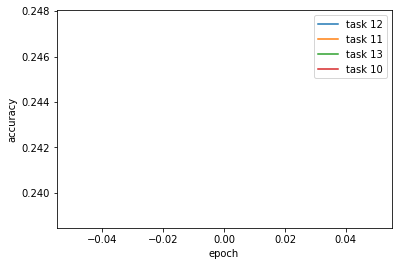

In [16]:
models = task.fit(dataset,
                  nets,
                  optimizers,
                  stop_criterion=stop_criterion)

The best accuracy is:

In [17]:
print(models[1])

0.2476


The best associated configuration is:

In [18]:
print(models[2])

{'fitspace:model': 'resnet152_v1', 'fitspace:optimizer': 'adam', 'fitspace:lr': 0.002401642765615183, 'fitspace:momentum': 0.870950129086579, 'fitspace:pretrained': False}


### Use Search Algorithm

`autogluon.searcher` will support both basic and SOTA searchers for both hyper-parameter optimization and architecture search. We now support random search. The default is using searcher is random searcher.

In [19]:
# cs is CS.ConfigurationSpace() where import ConfigSpace as CS, this is just example code;
# in practice, this is in fit function, and cs should not be None
cs = None
searcher = ag.searcher.RandomSampling(cs)

print(searcher)

RandomSampling(ConfigSpace: NoneResults: OrderedDict())


Or simply use string name:

In [20]:
searcher = 'random'

print(searcher)

random


### Use Trial Scheduler

`ag.scheduler` supports scheduling trials in serial order and with early stopping.

We support basic FIFO scheduler.

In [21]:
# this is just example code; in practice, this is in fit function

trial_scheduler = ag.scheduler.FIFO_Scheduler(
                task.pipeline.train_image_classification,
                None,
                {
                    'num_cpus': 4,
                    'num_gpus': 1,
                },
                searcher)

print(trial_scheduler)

We also support Hyperband which is an early stopping mechanism.

In [22]:
# this is just example code; in practice, this is in fit function

trial_scheduler = ag.scheduler.Hyperband_Scheduler(
                task.pipeline.train_image_classification,
                None,
                {
                    'num_cpus': 4,
                    'num_gpus': 1,
                },
                searcher,
                time_attr='epoch',
                reward_attr='accuracy',
                max_t=10,
                grace_period=1)

print(trial_scheduler)

### Resume Fit and Checkpointer

We use the resume and checkpoint dir in the scheduler.

In [23]:
savedir = 'checkpoint/demo.ag'
resume = False

In [24]:
trial_scheduler = ag.scheduler.Hyperband_Scheduler(
                task.pipeline.train_image_classification,
                None,
                {
                    'num_cpus': 4,
                    'num_gpus': 1,
                },
                searcher,
                checkpoint=savedir,
                resume=resume,
                time_attr='epoch',
                reward_attr='accuracy',
                max_t=10,
                grace_period=1)

print(trial_scheduler)

Or simply specify the trial scheduler with the string name:

In [25]:
trial_scheduler = 'hyperband'

### Visualize Training Curve

We could visualize the traing curve using `trial_scheduler.get_training_curves('{}.png'.format(os.path.splitext(savedir)[0]))`.

An example is shown below.

<div style="width: 500px;">![traingcurve](demo.png)</div>

### Create Stop Criterion

`autogluon` supports overall automatic constraints in `stop_criterion`.

In [26]:
stop_criterion = {
    'time_limits': 1*60*60,
    'max_metric': 0.80,
    'max_trial_count': 16
}

### Create Resources Per Trial

`autogluon` supports constraints for each trial `in resource_per_trial`.

In [27]:
resources_per_trial = {
    'max_num_gpus': 1,
    'max_num_cpus': 4,
    'max_training_epochs': 1
}

### Create AutoGluon Fit with Full Capacity

DEBUG:autogluon.task.image_classification.core:Start fitting
DEBUG:autogluon.task.image_classification.core:Start constructing search space
DEBUG:autogluon.task.image_classification.core:Finished.
DEBUG:autogluon.task.image_classification.core:Start using default backend.
INFO:autogluon.scheduler.fifo:Starting Experiments
INFO:autogluon.scheduler.fifo:Num of Finished Tasks is 14
INFO:autogluon.scheduler.fifo:Num of Pending Tasks is 2
DEBUG:autogluon.scheduler.hyperband:Adding A New Task Task(TASK_ID: 14) Task(fn=<function train_image_classification at 0x7fc60f3129d8>, args={'args': Namespace(epochs=1, lr=0.0001, model='resnet18_v1', optimizer='sgd', pretrained=True, train_data='./CIFAR10/train', val_data='./CIFAR10/valid'), 'config': {'fitspace:model': 'resnet50_v1', 'fitspace:optimizer': 'adam', 'fitspace:lr': 0.0028760807955725168, 'fitspace:momentum': 0.8682381272089972, 'fitspace:pretrained': False}}, resources=Resources(nCPUs = 4, nGPUs = 1)))
DEBUG:autogluon.scheduler.resource_ma

INFO:autogluon.scheduler.fifo:Saving Training Curve in checkpoint/demo.png
DEBUG:autogluon.task.image_classification.core:Finished.
DEBUG:autogluon.task.image_classification.core:Finished.


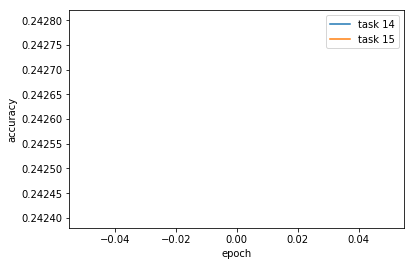

In [31]:
models = task.fit(dataset,
                  nets,
                  optimizers,
                  searcher=searcher,
                  trial_scheduler=trial_scheduler,
                  resume=resume,
                  savedir=savedir,
                  stop_criterion=stop_criterion,
                  resources_per_trial=resources_per_trial)

The best accuracy is

In [32]:
print(models[1])

0.2428


The associated best configuration is:

In [33]:
print(models[2])

{'fitspace:model': 'resnet18_v1', 'fitspace:optimizer': 'adam', 'fitspace:lr': 0.0033111035306047586, 'fitspace:momentum': 0.867339432479708, 'fitspace:pretrained': True}


### Resume AutoGluon Fit

We could resume the previous training for more epochs to achieve better results. Similarly, we could also increase `max_trial_count` for better results.

Here we increase the `max_training_epochs` from 1 to 5, `max_trial_count` from 2 to 10, and set `resume = True` which will load the checking point in the savedir.

In [34]:
stop_criterion = {
    'time_limits': 1*60*60,
    'max_metric': 0.80,
    'max_trial_count': 26
}

resources_per_trial = {
    'max_num_gpus': 1,
    'max_num_cpus': 4,
    'max_training_epochs': 10
}

resume = True

DEBUG:autogluon.task.image_classification.core:Start fitting
DEBUG:autogluon.task.image_classification.core:Start constructing search space
DEBUG:autogluon.task.image_classification.core:Finished.
DEBUG:autogluon.task.image_classification.core:Start using default backend.
INFO:autogluon.scheduler.scheduler:Seeting TASK ID: 16
DEBUG:autogluon.scheduler.scheduler:Loading FINISHED_TASKS: [{'TASK_ID': 6, 'Config': {'fitspace:model': 'resnet101_v1', 'fitspace:optimizer': 'adam', 'fitspace:lr': 0.054054546569617355, 'fitspace:momentum': 0.8933316015571741, 'fitspace:pretrained': False}}, {'TASK_ID': 5, 'Config': {'fitspace:model': 'resnet50_v1', 'fitspace:optimizer': 'adam', 'fitspace:lr': 0.051449363058242444, 'fitspace:momentum': 0.949490038379711, 'fitspace:pretrained': True}}, {'TASK_ID': 1, 'Config': {'fitspace:model': 'resnet101_v1', 'fitspace:optimizer': 'adam', 'fitspace:lr': 0.0007320528860097534, 'fitspace:momentum': 0.8963548623074746, 'fitspace:pretrained': True}}, {'TASK_ID': 4,

DEBUG:autogluon.scheduler.resource_manager:Reqeust succeed Resources(nCPUs = 4, CPU_IDs = {[16, 17, 18, 19]}, nGPUs = 1, GPU_IDs = {[7]})
DEBUG:autogluon.scheduler.hyperband:Adding A New Task Task(TASK_ID: 21) Task(fn=<function train_image_classification at 0x7fc60f3129d8>, args={'args': Namespace(epochs=10, lr=0.0001, model='resnet18_v1', optimizer='sgd', pretrained=True, train_data='./CIFAR10/train', val_data='./CIFAR10/valid'), 'config': {'fitspace:model': 'resnet34_v1', 'fitspace:optimizer': 'adam', 'fitspace:lr': 0.0032273279121336177, 'fitspace:momentum': 0.859931797996495, 'fitspace:pretrained': False}}, resources=Resources(nCPUs = 4, nGPUs = 1)))
DEBUG:autogluon.scheduler.resource_manager:Reqeust succeed Resources(nCPUs = 4, CPU_IDs = {[28, 29, 30, 31]}, nGPUs = 1, GPU_IDs = {[2]})
DEBUG:autogluon.scheduler.hyperband:Adding A New Task Task(TASK_ID: 22) Task(fn=<function train_image_classification at 0x7fc60f3129d8>, args={'args': Namespace(epochs=10, lr=0.0001, model='resnet18_

INFO:autogluon.searcher.searcher:Finished Task with config: {"fitspace:model": "resnet101_v1", "fitspace:optimizer": "adam", "fitspace:lr": 0.002774061492399318, "fitspace:momentum": 0.8732060211141387, "fitspace:pretrained": true} and reward: 0.2444
DEBUG:autogluon.scheduler.fifo:Saving Checkerpoint
DEBUG:autogluon.scheduler.resource_manager:Reqeust succeed Resources(nCPUs = 4, CPU_IDs = {[32, 33, 34, 35]}, nGPUs = 1, GPU_IDs = {[7]})
DEBUG:autogluon.scheduler.scheduler:State_Dict cls.FINISHED_TASKS: [{'TASK_ID': 6, 'Config': {'fitspace:model': 'resnet101_v1', 'fitspace:optimizer': 'adam', 'fitspace:lr': 0.054054546569617355, 'fitspace:momentum': 0.8933316015571741, 'fitspace:pretrained': False}}, {'TASK_ID': 5, 'Config': {'fitspace:model': 'resnet50_v1', 'fitspace:optimizer': 'adam', 'fitspace:lr': 0.051449363058242444, 'fitspace:momentum': 0.949490038379711, 'fitspace:pretrained': True}}, {'TASK_ID': 1, 'Config': {'fitspace:model': 'resnet101_v1', 'fitspace:optimizer': 'adam', 'fits

INFO:autogluon.searcher.searcher:Finished Task with config: {"fitspace:model": "resnet34_v1", "fitspace:optimizer": "sgd", "fitspace:lr": 0.00031481040578668036, "fitspace:momentum": 0.9072226656925563, "fitspace:pretrained": false} and reward: 0.2449
DEBUG:autogluon.scheduler.fifo:Saving Checkerpoint
DEBUG:autogluon.scheduler.scheduler:State_Dict cls.FINISHED_TASKS: [{'TASK_ID': 6, 'Config': {'fitspace:model': 'resnet101_v1', 'fitspace:optimizer': 'adam', 'fitspace:lr': 0.054054546569617355, 'fitspace:momentum': 0.8933316015571741, 'fitspace:pretrained': False}}, {'TASK_ID': 5, 'Config': {'fitspace:model': 'resnet50_v1', 'fitspace:optimizer': 'adam', 'fitspace:lr': 0.051449363058242444, 'fitspace:momentum': 0.949490038379711, 'fitspace:pretrained': True}}, {'TASK_ID': 1, 'Config': {'fitspace:model': 'resnet101_v1', 'fitspace:optimizer': 'adam', 'fitspace:lr': 0.0007320528860097534, 'fitspace:momentum': 0.8963548623074746, 'fitspace:pretrained': True}}, {'TASK_ID': 4, 'Config': {'fitsp

DEBUG:autogluon.scheduler.reporter:StatusReporter reporting: {"epoch": 1, "accuracy": 0.2466, "time_this_iter": 26.460251569747925}
DEBUG:autogluon.scheduler.hyperband:Removing task Task(TASK_ID: 24) Task(fn=<function train_image_classification at 0x7fc60f3129d8>, args={'args': Namespace(epochs=10, lr=0.0001, model='resnet18_v1', optimizer='sgd', pretrained=True, train_data='./CIFAR10/train', val_data='./CIFAR10/valid'), 'config': {'fitspace:model': 'resnet152_v1', 'fitspace:optimizer': 'sgd', 'fitspace:lr': 0.0002088257596487824, 'fitspace:momentum': 0.939103663760496, 'fitspace:pretrained': True}, 'reporter': <autogluon.scheduler.reporter.StatusReporter object at 0x7fc60c0b2d30>}, resources=Resources(nCPUs = 4, CPU_IDs = {[36, 37, 38, 39]}, nGPUs = 1, GPU_IDs = {[6]}))) due to low performance
INFO:autogluon.searcher.searcher:Finished Task with config: {"fitspace:model": "resnet152_v1", "fitspace:optimizer": "sgd", "fitspace:lr": 0.0002088257596487824, "fitspace:momentum": 0.939103663

DEBUG:autogluon.scheduler.reporter:StatusReporter reporting: {"epoch": 4, "accuracy": 0.33475, "time_this_iter": 21.285646200180054}
DEBUG:autogluon.scheduler.hyperband:Removing task Task(TASK_ID: 21) Task(fn=<function train_image_classification at 0x7fc60f3129d8>, args={'args': Namespace(epochs=10, lr=0.0001, model='resnet18_v1', optimizer='sgd', pretrained=True, train_data='./CIFAR10/train', val_data='./CIFAR10/valid'), 'config': {'fitspace:model': 'resnet34_v1', 'fitspace:optimizer': 'adam', 'fitspace:lr': 0.0032273279121336177, 'fitspace:momentum': 0.859931797996495, 'fitspace:pretrained': False}, 'reporter': <autogluon.scheduler.reporter.StatusReporter object at 0x7fc604742e10>}, resources=Resources(nCPUs = 4, CPU_IDs = {[28, 29, 30, 31]}, nGPUs = 1, GPU_IDs = {[2]}))) due to low performance
INFO:autogluon.searcher.searcher:Finished Task with config: {"fitspace:model": "resnet34_v1", "fitspace:optimizer": "adam", "fitspace:lr": 0.0032273279121336177, "fitspace:momentum": 0.8599317

DEBUG:autogluon.scheduler.reporter:StatusReporter reporting: {"epoch": 5, "accuracy": 0.35424, "time_this_iter": 17.10438585281372}
DEBUG:autogluon.scheduler.reporter:StatusReporter reporting: {"epoch": 6, "accuracy": 0.37033333333333335, "time_this_iter": 19.984201669692993}
DEBUG:autogluon.scheduler.reporter:StatusReporter reporting: {"epoch": 7, "accuracy": 0.3848714285714286, "time_this_iter": 18.978421688079834}
DEBUG:autogluon.scheduler.reporter:StatusReporter reporting: {"epoch": 8, "accuracy": 0.39755, "time_this_iter": 18.220662593841553}
DEBUG:autogluon.scheduler.reporter:StatusReporter reporting: {"epoch": 9, "accuracy": 0.4087777777777778, "time_this_iter": 18.849393844604492}
DEBUG:autogluon.scheduler.reporter:StatusReporter reporting: {"epoch": 10, "accuracy": 0.41849, "time_this_iter": 18.799818992614746}
DEBUG:autogluon.scheduler.hyperband:Removing task Task(TASK_ID: 19) Task(fn=<function train_image_classification at 0x7fc60f3129d8>, args={'args': Namespace(epochs=10, 

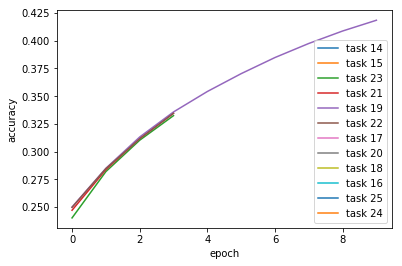

In [38]:
models = task.fit(dataset,
                  nets,
                  optimizers,
                  searcher=searcher,
                  trial_scheduler=trial_scheduler,
                  resume=resume,
                  savedir=savedir,
                  stop_criterion=stop_criterion,
                  resources_per_trial=resources_per_trial)

The best accuracy is

In [39]:
print(models[1])

0.41849


The associated best configuration is:

In [40]:
print(models[2])

{'fitspace:model': 'resnet18_v1', 'fitspace:optimizer': 'adam', 'fitspace:lr': 0.0021771757153342584, 'fitspace:momentum': 0.9052141403297904, 'fitspace:pretrained': False}


## Refereces

* code: https://code.amazon.com/packages/AutoGluon/trees/heads/mainline 
* API design: https://quip-amazon.com/aaGsAS9lY3WU/AutoGluon-API
* Implementation roadmap: https://quip-amazon.com/zlQUAjSWBc3c/AutoGluon-System-Implementation-Roadmap